# Upload df

In [1]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/scantronMath_38.csv')


In [2]:
one_hot_encoded_df2.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,...,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.957757
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.949346
2,44784,6,value_scantronMath,True,1.021622,False,False,False,True,False,...,False,False,True,False,False,False,0,0,0,0.990132
3,44807,7,value_scantronMath,True,1.015190,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,1.035514
4,44809,7,value_scantronMath,False,0.921740,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.934393


In [4]:
one_hot_encoded_df2.columns.tolist()

['studentId',
 'level',
 'dataSource',
 'is_proficient',
 'proficient_score',
 'course_AIDELIB7-8NC',
 'course_AIDSTU6-12NC',
 'course_ARTHIS7-8',
 'course_Advisory 5',
 'course_Advisory 6',
 'course_Advisory 7',
 'course_Advisory 7-8',
 'course_Advisory 8',
 'course_Aide Off 7-8',
 'course_BAND 6',
 'course_BAND 7 Brass',
 'course_BAND 7 Percu',
 'course_BAND 7 Wood',
 'course_BROADCAS 7-8',
 'course_Band 7',
 'course_Band7',
 'course_BandGuitar78',
 'course_CONTISSU 7-8',
 'course_CREAWRT 7-8',
 'course_CSElec Gr7-8',
 'course_CareerPrep-A',
 'course_CareerPrepA5',
 'course_CivicH/Adv 7',
 'course_CivicsGr 7',
 'course_ContIssu 7-8',
 'course_Drama 7-8',
 'course_ELA IntPK-6',
 'course_ELAGrPK5H/Ad',
 'course_ELAGrPK6H/Ad',
 'course_ENRICELA78',
 'course_ENRICMATH78',
 'course_ESLENRICH6-8',
 'course_ESLEnrich6-8',
 'course_Eng 7 H/Adv',
 'course_EngElec7-8',
 'course_EngIntrv7-12',
 'course_EngLang6',
 'course_English Gr 7',
 'course_English Gr 8',
 'course_English LA 5',
 'course_E

In [5]:
# drop Id and binary colu,m
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'is_proficient'])

In [6]:
one_hot_encoded_df2 = one_hot_encoded_df2[one_hot_encoded_df2['dataSource'] == 'value_scantronMath'].drop(columns=['dataSource'])


In [9]:

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Print DataFrame info to see all columns and their data types
print(one_hot_encoded_df2.info())

# Print the count of null values per column
print(one_hot_encoded_df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20571 entries, 0 to 20570
Columns: 139 entries, level to past_proficient_score
dtypes: bool(133), float64(2), int64(4)
memory usage: 3.6 MB
None
level                        0
proficient_score             0
course_AIDELIB7-8NC          0
course_AIDSTU6-12NC          0
course_ARTHIS7-8             0
                          ... 
school_Middle School F       0
iready_math                  0
iready_reading               0
bbb_literacy                 0
past_proficient_score     5422
Length: 139, dtype: int64


In [10]:
# Find columns with null values and print their names
null_columns = one_hot_encoded_df2.columns[one_hot_encoded_df2.isnull().any()]

print(null_columns)


Index(['past_proficient_score'], dtype='object')


In [11]:
one_hot_encoded_df2.shape

(20571, 139)

In [12]:
one_hot_encoded_df2['past_proficient_score']

0        0.957757
1        0.949346
2        0.990132
3        1.035514
4        0.934393
           ...   
20566         NaN
20567         NaN
20568         NaN
20569         NaN
20570    0.913837
Name: past_proficient_score, Length: 20571, dtype: float64

In [13]:
one_hot_encoded_df2 = one_hot_encoded_df2.dropna(subset=['past_proficient_score'])

In [14]:
one_hot_encoded_df2.shape

(15149, 139)

# start of XGBoost model

In [15]:

import numpy as np
from sklearn.model_selection import train_test_split

X = one_hot_encoded_df2.drop('proficient_score', axis=1)
y = one_hot_encoded_df2['proficient_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cross-Validated MSE: 0.00
[0]	train-rmse:0.07104	eval-rmse:0.07458
[1]	train-rmse:0.06694	eval-rmse:0.07084
[2]	train-rmse:0.06337	eval-rmse:0.06768
[3]	train-rmse:0.06032	eval-rmse:0.06505
[4]	train-rmse:0.05767	eval-rmse:0.06281
[5]	train-rmse:0.05539	eval-rmse:0.06092
[6]	train-rmse:0.05342	eval-rmse:0.05942
[7]	train-rmse:0.05176	eval-rmse:0.05815
[8]	train-rmse:0.05032	eval-rmse:0.05710
[9]	train-rmse:0.04914	eval-rmse:0.05621
[10]	train-rmse:0.04807	eval-rmse:0.05554
[11]	train-rmse:0.04720	eval-rmse:0.05498
[12]	train-rmse:0.04646	eval-rmse:0.05452
[13]	train-rmse:0.04584	eval-rmse:0.05413
[14]	train-rmse:0.04527	eval-rmse:0.05383
[15]	train-rmse:0.04478	eval-rmse:0.05359
[16]	train-rmse:0.04437	eval-rmse:0.05341
[17]	train-rmse:0.04403	eval-rmse:0.05326
[18]	train-rmse:0.04375	eval-rmse:0.05314
[19]	train-rmse:0.04346	eval-rmse:0.05302
[20]	train-rmse:0.04324	eval-rmse:0.05295
[21]	train-rmse:0.04305	eval-rmse:0.05291
[22]	train-rmse:0.04283	eval-rmse:0.05284
[23]	train-rmse:0.

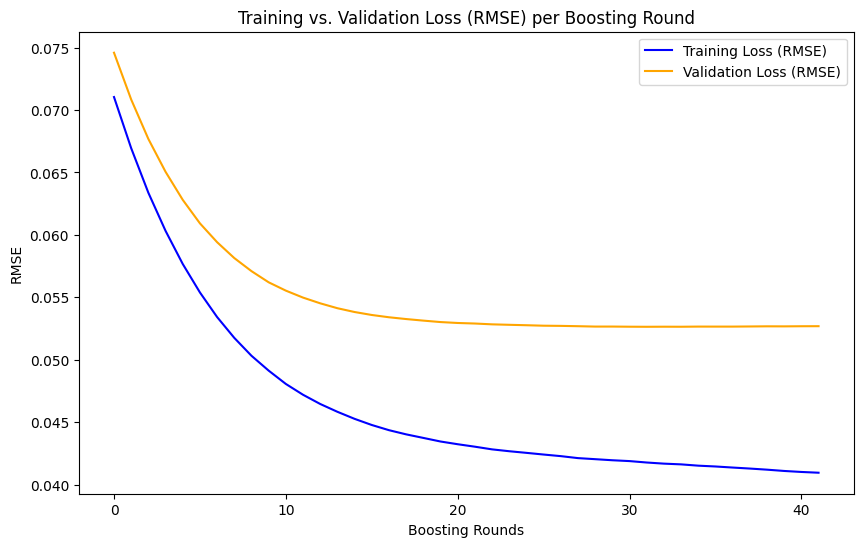

XGBoost - MSE: 0.00, R²: 0.55, RMSE: 0.05


In [16]:
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBRegressor with additional regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to get an estimate of the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE: {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6, 
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping, tracking both training and validation losses
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract train and eval loss from evals_result
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred = xgb_model_trained.predict(dtest)

# Evaluate the model's performance on the test set
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


In [17]:


#Calculate feature importance
feature_importances = xgb_model_trained.get_score(importance_type='weight')

# Convert feature importance into a DataFrame
importance_df = pd.DataFrame(
    list(feature_importances.items()),
    columns=['Feature', 'Importance']
)

# Calculate correlation of each feature with the label
correlations = []
for feature in importance_df['Feature']:
    if feature in X.columns:  # Ensure the feature exists in the original dataset
        corr = X[feature].corr(y)  # Pearson correlation
        correlations.append(corr)
    else:
        correlations.append(None)  # Handle cases where feature names mismatch (if any)

# Add correlation to the DataFrame
importance_df['Correlation'] = correlations

# Add positive/negative correlation indication
importance_df['Correlation_Sign'] = importance_df['Correlation'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
importance_df[importance_df['Importance'] > 20].reset_index()





,index,Feature,Importance,Correlation,Correlation_Sign
0,94,past_proficient_score,907.0,0.664846,Positive
1,0,level,277.0,0.047902,Positive
2,87,school_Elementary School F,50.0,-0.033985,Negative
3,90,school_Middle School D,41.0,0.006694,Positive
4,38,course_HOMEROOM,41.0,-0.021171,Negative
5,74,course_Science Gr 6,38.0,-0.032187,Negative
6,29,course_English LA 5,36.0,-0.040563,Negative
7,67,course_SCIENCE 5,29.0,-0.046274,Negative
8,91,school_Middle School F,28.0,-0.056597,Negative
9,48,course_MATH 7,27.0,0.002020,Positive


In [18]:
importance_df[importance_df['Correlation'] > 0.1]

,Feature,Importance,Correlation,Correlation_Sign
94,past_proficient_score,907.0,0.664846,Positive
51,course_Math 7 H/A,12.0,0.112041,Positive


In [19]:
importance_df[importance_df['Correlation'] < -0.1]

,Feature,Importance,Correlation,Correlation_Sign
50,course_Math 7,23.0,-0.102295,Negative
81,course_StuHallPK6,21.0,-0.121816,Negative


## partial dependence plot of 'level

[0]	validation_0-rmse:0.07463
[1]	validation_0-rmse:0.07093
[2]	validation_0-rmse:0.06780
[3]	validation_0-rmse:0.06519
[4]	validation_0-rmse:0.06296
[5]	validation_0-rmse:0.06108
[6]	validation_0-rmse:0.05957
[7]	validation_0-rmse:0.05831
[8]	validation_0-rmse:0.05726
[9]	validation_0-rmse:0.05639
[10]	validation_0-rmse:0.05567
[11]	validation_0-rmse:0.05513
[12]	validation_0-rmse:0.05467
[13]	validation_0-rmse:0.05429
[14]	validation_0-rmse:0.05398
[15]	validation_0-rmse:0.05372
[16]	validation_0-rmse:0.05353
[17]	validation_0-rmse:0.05337
[18]	validation_0-rmse:0.05322
[19]	validation_0-rmse:0.05311
[20]	validation_0-rmse:0.05302
[21]	validation_0-rmse:0.05296
[22]	validation_0-rmse:0.05290
[23]	validation_0-rmse:0.05284
[24]	validation_0-rmse:0.05281
[25]	validation_0-rmse:0.05278
[26]	validation_0-rmse:0.05276
[27]	validation_0-rmse:0.05274
[28]	validation_0-rmse:0.05276
[29]	validation_0-rmse:0.05275
[30]	validation_0-rmse:0.05275
[31]	validation_0-rmse:0.05274
[32]	validation_0-

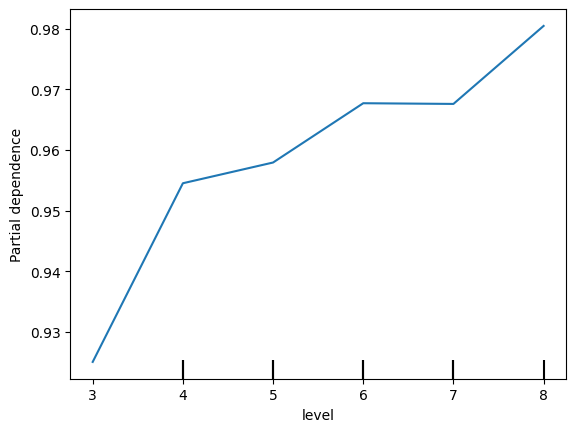

In [20]:
from sklearn.inspection import PartialDependenceDisplay
# Fit the model using XGBRegressor
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# PDP: Plot Partial Dependence for a specific feature
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(xgb_model, X_train, ['level'])
plt.show()


